<a href="https://colab.research.google.com/github/experimentalsolution/process-mining/blob/main/mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Process Mining with PM4Py  
### A Hands-On Tutorial Using Real Event Log Data
In this notebook, we will explore how to perform **process discovery** in a simple way and find out bottleneck of a real process




In [2]:
!pip install pm4py





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.8 MB/s eta 0:00:00


In [4]:
import pm4py

import pandas as pd

In [5]:
df = pd.read_csv('HR_Onboarding.csv')

In [6]:
df.head()

,Employee_ID,Activity,Timestamp,CO2_Impact,Activity_Cost
0,EMP0001,First Week Check-in,2020-07-06 13:49:35,0.46,89.90
1,EMP0001,Introduction Session,2020-07-16 22:49:35,0.11,96.72
2,EMP0001,Complete Documentation,2020-07-27 10:49:35,1.85,351.35
3,EMP0001,IT Setup,2020-08-08 17:49:35,0.96,135.54
4,EMP0001,Training Module 1,2020-08-18 23:49:35,0.17,166.22


In [7]:
df = df.rename(columns={
    "Employee_ID": "case:concept:name",
    "Activity": "concept:name",
    "Timestamp": "time:timestamp"
})


In [8]:
df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])


In [9]:
df.head()

,case:concept:name,concept:name,time:timestamp,CO2_Impact,Activity_Cost
0,EMP0001,First Week Check-in,2020-07-06 13:49:35,0.46,89.90
1,EMP0001,Introduction Session,2020-07-16 22:49:35,0.11,96.72
2,EMP0001,Complete Documentation,2020-07-27 10:49:35,1.85,351.35
3,EMP0001,IT Setup,2020-08-08 17:49:35,0.96,135.54
4,EMP0001,Training Module 1,2020-08-18 23:49:35,0.17,166.22


In [10]:
import pm4py
log = pm4py.convert_to_event_log(df)
log


[{'attributes': {'concept:name': 'EMP0001'}, 'events': [{'concept:name': 'First Week Check-in', 'time:timestamp': Timestamp('2020-07-06 13:49:35'), 'CO2_Impact': 0.46, 'Activity_Cost': 89.9}, '..', {'concept:name': 'Training Module 2', 'time:timestamp': Timestamp('2020-08-31 08:49:35'), 'CO2_Impact': 1.19, 'Activity_Cost': 452.15}]}, '....', {'attributes': {'concept:name': 'EMP1000'}, 'events': [{'concept:name': 'First Week Check-in', 'time:timestamp': Timestamp('2023-10-13 23:47:28'), 'CO2_Impact': 0.53, 'Activity_Cost': 88.61}, '..', {'concept:name': 'Training Module 2', 'time:timestamp': Timestamp('2023-12-01 22:47:28'), 'CO2_Impact': 1.3, 'Activity_Cost': 265.89}]}]

In [11]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization


In [12]:
dfg = dfg_discovery.apply(log)
dfg


Counter({('First Week Check-in', 'Introduction Session'): 1000,
         ('Introduction Session', 'Complete Documentation'): 1000,
         ('Complete Documentation', 'IT Setup'): 1000,
         ('IT Setup', 'Training Module 1'): 1000,
         ('Training Module 1', 'Training Module 2'): 1000})

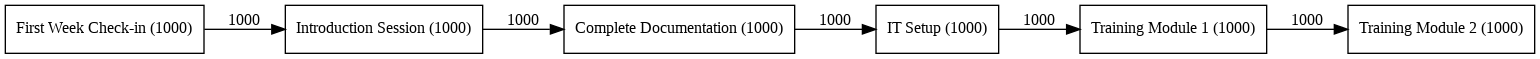

In [13]:
gviz = dfg_visualization.apply(dfg, log=log)
dfg_visualization.view(gviz)


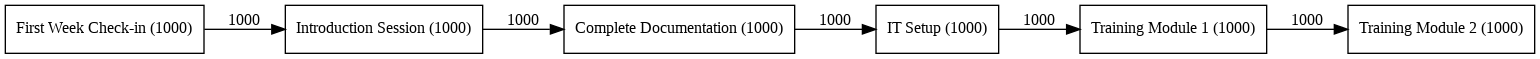

In [14]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg_freq = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)
gviz_freq = dfg_visualization.apply(dfg_freq, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz_freq)


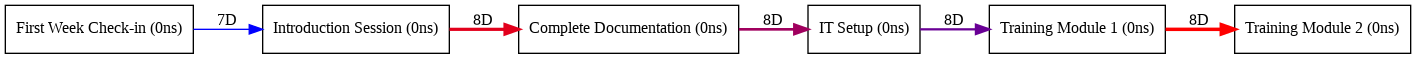

In [15]:
dfg_perf = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz_perf = dfg_visualization.apply(dfg_perf, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz_perf)
